<a href="https://www.kaggle.com/code/uzairajokhio/ipl-2023-auction-eda?scriptVersionId=182877227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/en/a/a2/TATA_IPL_2023_Logo.png" alt="IPL Logo">
</div>

In [1]:
# Importing all necessary libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/ipl-auction-2023/iplauction2023.csv')
data.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [4]:
data.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [5]:
data.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

# SOLD V RETAINED

### **In this Analysis we are only intrested in *sold* and *retatined* player so we have to remove all unsold player**

In [6]:
ipl_player = data[(data['status'] == 'SOLD') | (data['status'] == 'RETAINED')]

In [7]:
ipl_player.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)      0
franchise                  0
status                     0
dtype: int64

## *Base price (in lacs)* has 158 null value because these are reatined player that the team hasnt sold

In [8]:
ipl_player.head()
ipl_player['status'].value_counts()

status
RETAINED    158
SOLD         80
Name: count, dtype: int64

## There are **158** *Retained player* where else **80** *Sold player*

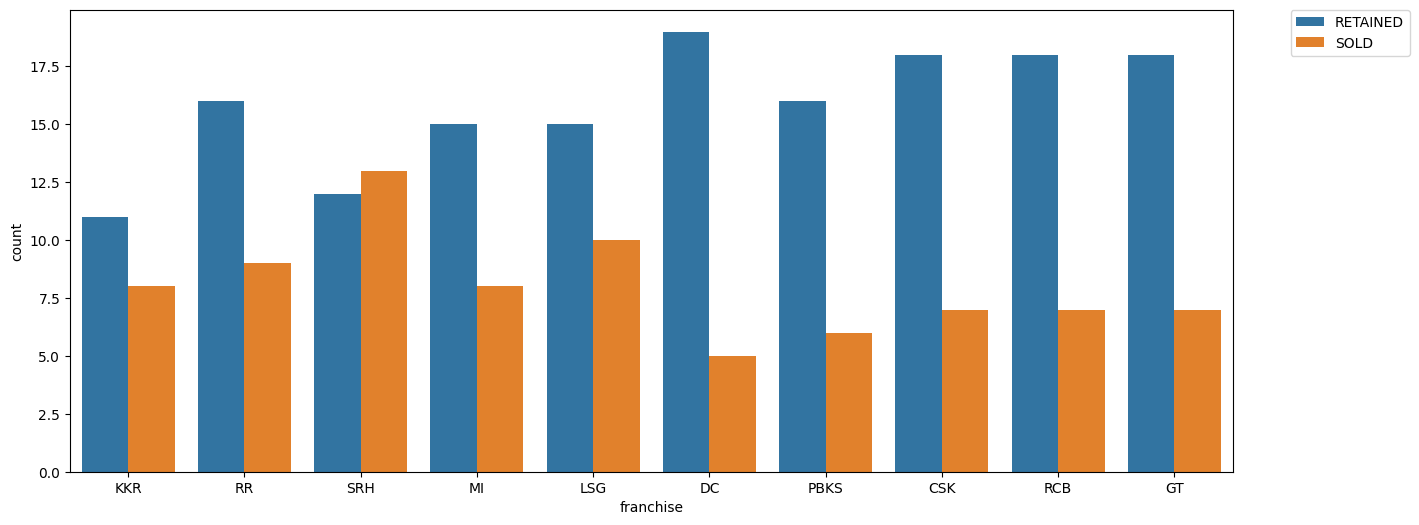

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(data=ipl_player, x='franchise', hue='status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

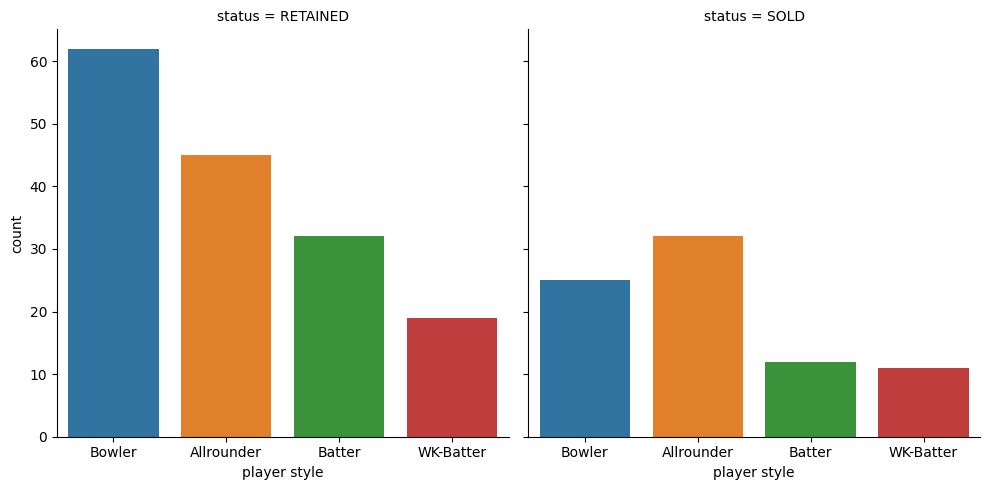

In [10]:
sns.catplot(data=ipl_player, x='player style', kind='count', col='status')

# Sold Player

In [11]:
sold_player = ipl_player[ipl_player['status'] == 'SOLD']

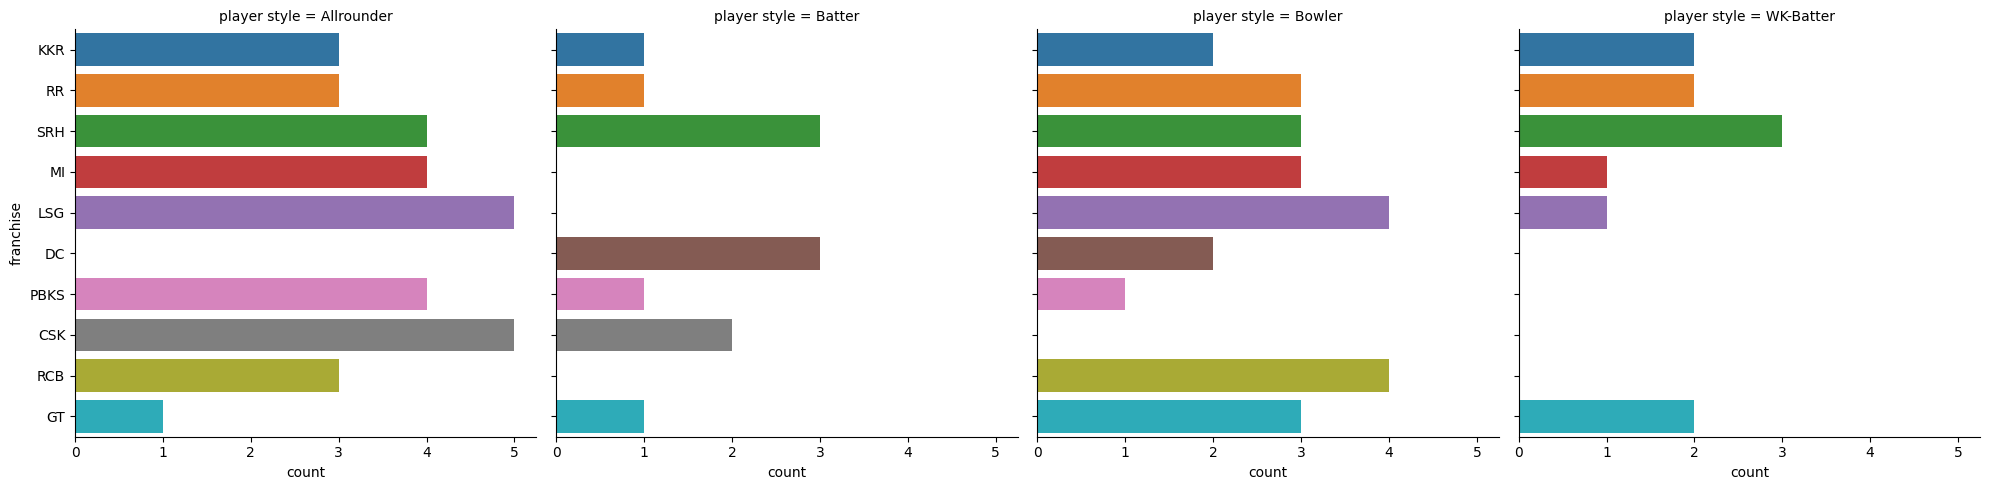

In [12]:
sns.catplot(data=sold_player, y='franchise', kind='count', col='player style')

## *The most Expensive player **sold** in IPL 2023*

In [13]:
most_exp_ply = sold_player[sold_player['final price (in lacs)'] == sold_player['final price (in lacs)'].max()]
most_exp_ply

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD


> Sam Curran was sold for 1850 lacs to PBKS

## *The top **5** least Expensive player sold in IPL 2023*

In [14]:
least_exp_ply  = sold_player[sold_player['final price (in lacs)'] == sold_player['final price (in lacs)'].min()]
least_exp_ply.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD
14,Akash Vashist,Allrounder,India,20.0,20.0,RR,SOLD
19,Murugan Ashwin,Bowler,India,20.0,20.0,RR,SOLD


In [15]:
batter = sold_player[(sold_player['player style'] == 'Batter')]
exp_batter = batter[batter['final price (in lacs)'] == batter['final price (in lacs)'].max()]
exp_batter

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
151,Harry Brook,Batter,England,150.0,1325.0,SRH,SOLD


> Harry Brook was the expensive batsmen sold 1350 lacs to SRH

In [16]:
bowler = sold_player[(sold_player['player style'] == 'Bowler')]
exp_bowler = bowler[bowler['final price (in lacs)'] == bowler['final price (in lacs)'].max()]
exp_bowler

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
104,Shivam Mavi,Bowler,India,40.0,600.0,GT,SOLD


> the expensive bowler sold in ipl 2023

In [17]:
keeper = sold_player[(sold_player['player style'] == 'WK-Batter')]
exp_keeper = keeper[keeper['final price (in lacs)'] == keeper['final price (in lacs)'].max()]
exp_keeper

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
136,Nicholas Pooran,WK-Batter,West Indies,200.0,1600.0,LSG,SOLD


>  the expensive Wicket keeper batter solin ipl 2023

# Retained Players

In [18]:
ret_player = ipl_player[ipl_player['status'] == 'RETAINED']

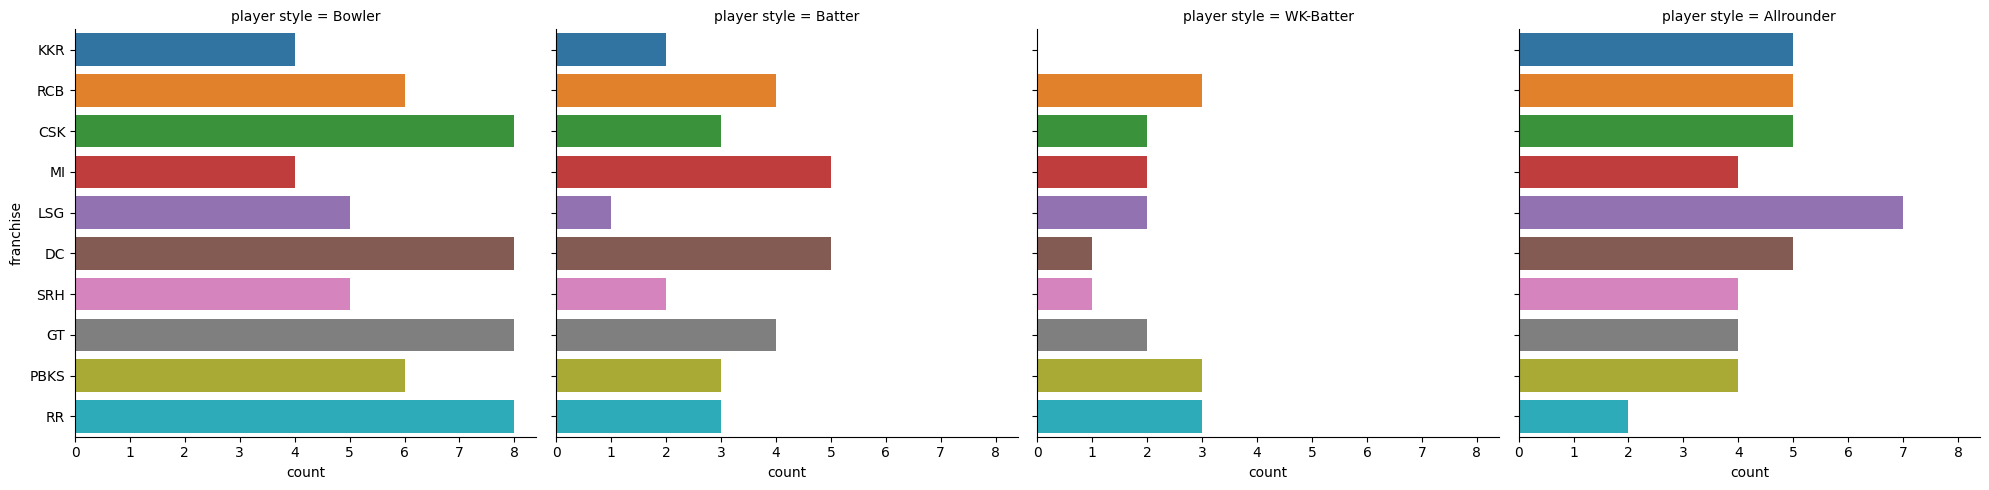

In [19]:
sns.catplot(data=ret_player, y='franchise', kind='count', col='player style')

In [20]:
ret_exp_ply = ret_player[ret_player['final price (in lacs)'] == ret_player['final price (in lacs)'].max()]
ret_exp_ply

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
292,KL Rahul,WK-Batter,India,NaN,1700.0,LSG,RETAINED


In [21]:
ret_least_exp  = ret_player[ret_player['final price (in lacs)'] == ret_player['final price (in lacs)'].min()]
ret_least_exp.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
157,Akash Madhwal,Bowler,India,NaN,20.0,MI,RETAINED


In [22]:
batter = ret_player[(ret_player['player style'] == 'Batter')]
ret_batter = batter[batter['final price (in lacs)'] == batter['final price (in lacs)'].max()]
ret_batter

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
290,Rohit Sharma,Batter,India,NaN,1600.0,MI,RETAINED


In [23]:
bowler = ret_player[(ret_player['player style'] == 'Bowler')]
ret_bowler = bowler[bowler['final price (in lacs)'] == bowler['final price (in lacs)'].max()]
ret_bowler

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
300,Rashid Khan,Bowler,Afghanistan,NaN,1500.0,GT,RETAINED


In [24]:
keeper = ret_player[(ret_player['player style'] == 'WK-Batter')]
ret_keeper = keeper[keeper['final price (in lacs)'] == keeper['final price (in lacs)'].max()]
ret_keeper

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
292,KL Rahul,WK-Batter,India,NaN,1700.0,LSG,RETAINED


# Player styles by nationality:

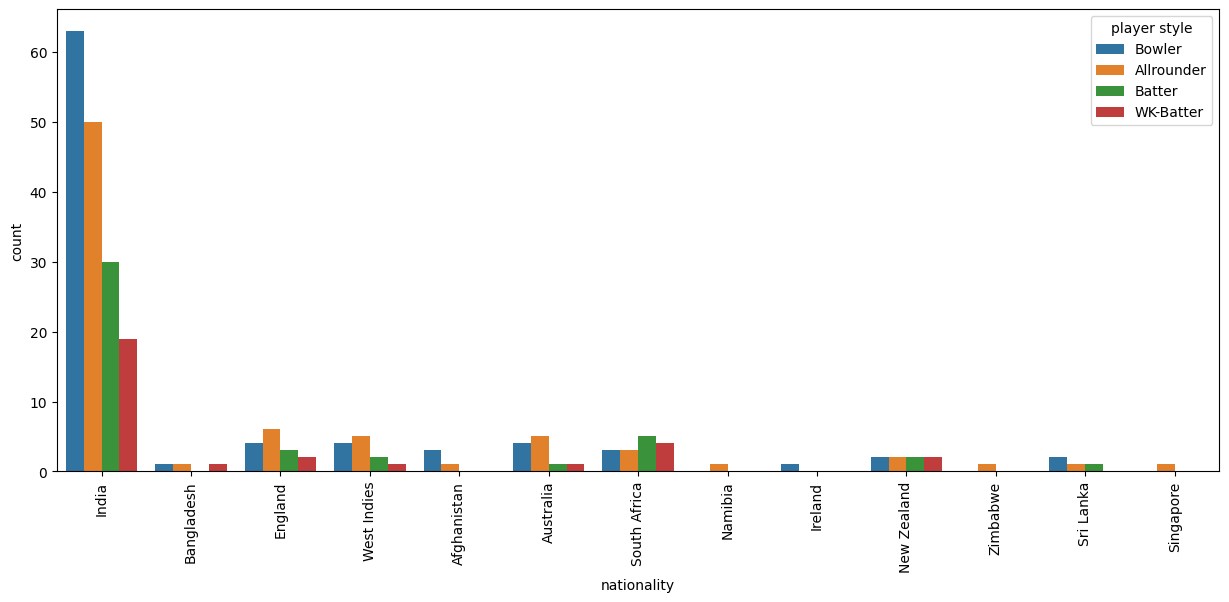

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='nationality', hue='player style', data=ipl_player)
plt.xticks(rotation=90)
plt.show()

# Average final price by nationality:

In [26]:
ipl_player.groupby('nationality')['final price (in lacs)'].mean()

nationality
Afghanistan     407.500000
Australia       591.818182
Bangladesh      133.333333
England         745.666667
India           323.456790
Ireland         440.000000
Namibia         100.000000
New Zealand     221.250000
Singapore       825.000000
South Africa    360.333333
Sri Lanka       303.750000
West Indies     472.500000
Zimbabwe         50.000000
Name: final price (in lacs), dtype: float64

# Money spend by Franchise

In [27]:
ipl_player.groupby('franchise')['final price (in lacs)'].sum()

franchise
CSK     9350.0
DC      8685.0
GT      9055.0
KKR     6410.0
LSG     9065.0
MI      9420.0
PBKS    8280.0
RCB     9325.0
RR      9165.0
SRH     8845.0
Name: final price (in lacs), dtype: float64

<Axes: xlabel='franchise', ylabel='final price (in lacs)'>

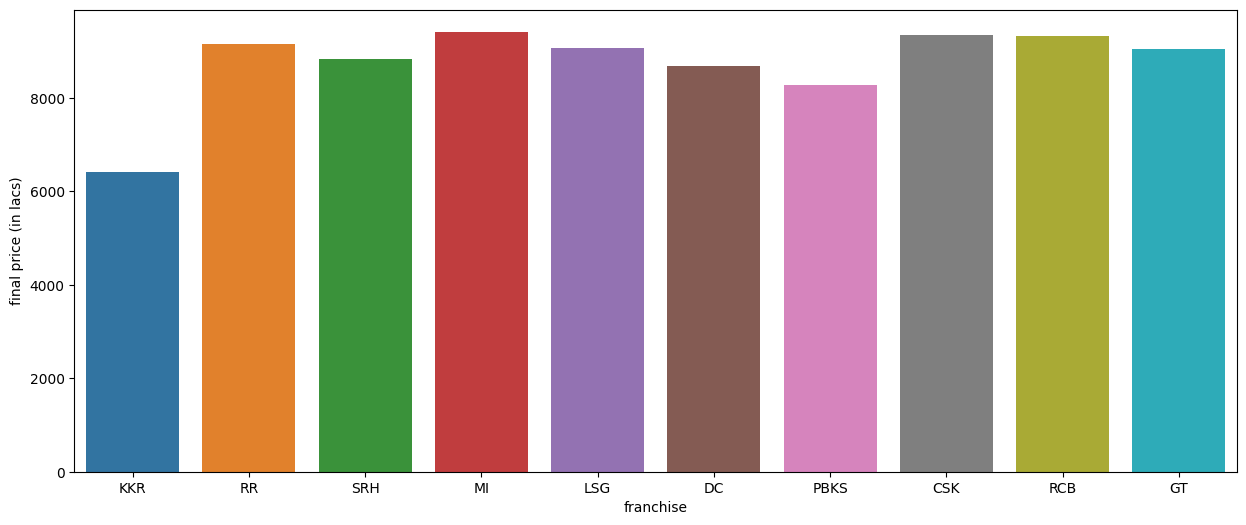

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='franchise', y='final price (in lacs)', data=ipl_player, estimator=sum, errorbar=None)

<Axes: title={'center': 'Top player auctions'}, xlabel='name', ylabel='final price (in lacs)'>

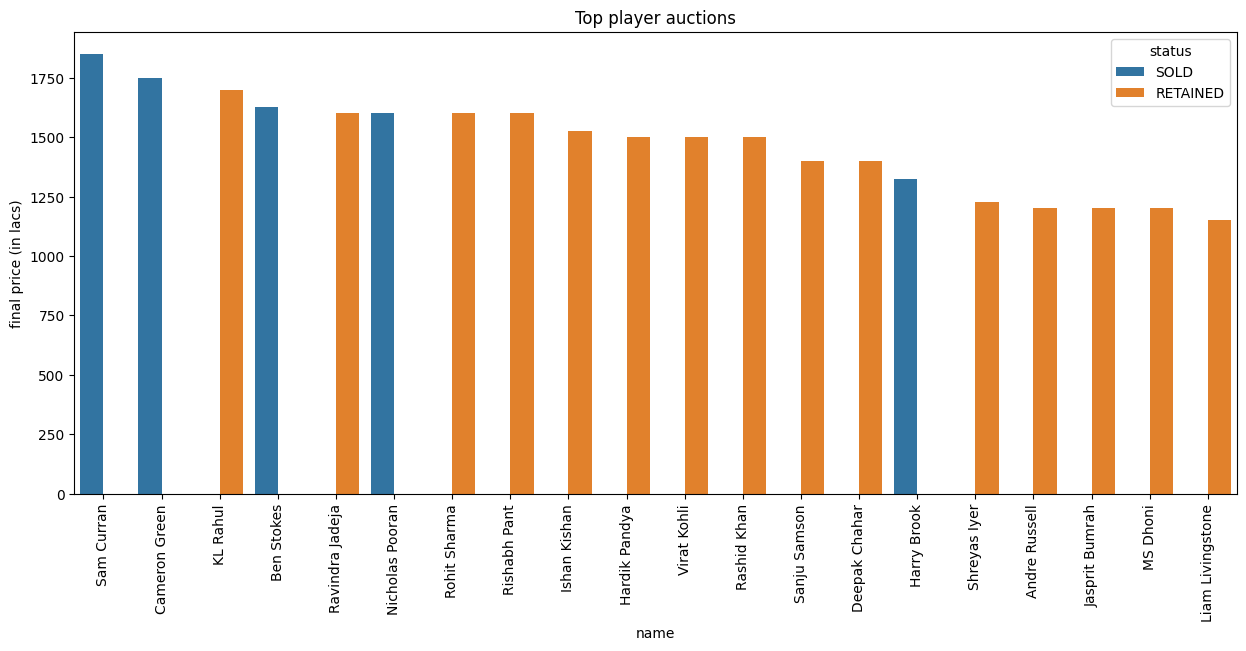

In [29]:
plt.figure(figsize=(15,6))
plt.title("Top player auctions")
top_players = ipl_player.sort_values(by=["final price (in lacs)"], ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x="name", y="final price (in lacs)",hue='status', data=top_players)